In [9]:
import tensorflow as tf
import numpy as np
import os
import skimage

In [10]:
path = "croppedImages/"
num = 24678 #24 678 in folder

dataset = []

for img in range(1,num + 1):  
    img_array = skimage.util.img_as_float32(skimage.io.imread(path + str(img) + ".png"))
    dataset.append(img_array)
      

len(dataset)

24678

In [11]:
import random

random.shuffle(dataset)
dataset = np.array(dataset)

print(dataset.shape)

(24678, 32, 32, 3)


In [12]:
#Convolutional autoencoder with dense layer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, Reshape, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import TensorBoard
import time

#NAME = 'Conv-AE-2x2-denseEnd-32x32' + str(time.time())
NAME = 'Conv-AE-8x8-Conv-end-sigmoid' + str(time.time())
tensorboard = TensorBoard(log_dir='logs/' + NAME)


model = Sequential()

model.add(Conv2D(3,(3,3), input_shape = dataset.shape[1:], padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##16x16

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##8x8

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) ##4x4

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(UpSampling2D((2,2))) #8x8

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(UpSampling2D((2,2))) #16x16

model.add(Conv2D(3,(3,3),  padding='same'))
model.add(UpSampling2D((2,2))) #32x32

model.add(Conv2D(16,(3,3), padding='same'))
model.add(Conv2D(3,(3,3), padding='same'))
model.add(Activation("sigmoid"))#32x32 output

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(dataset,dataset,batch_size=64, verbose=1,epochs=20, validation_split=0.01, callbacks=[tensorboard])

Train on 24431 samples, validate on 247 samples
Epoch 1/20
24431/24431 [==============================] - 28s 1ms/sample - loss: 0.0306 - val_loss: 0.0232
Epoch 2/20
24431/24431 [==============================] - 22s 904us/sample - loss: 0.0221 - val_loss: 0.0207
Epoch 3/20
24431/24431 [==============================] - 22s 910us/sample - loss: 0.0204 - val_loss: 0.0194
Epoch 4/20
24431/24431 [==============================] - 23s 930us/sample - loss: 0.0192 - val_loss: 0.0184
Epoch 5/20
24431/24431 [==============================] - 41s 2ms/sample - loss: 0.0184 - val_loss: 0.0178
Epoch 6/20
24431/24431 [==============================] - 25s 1ms/sample - loss: 0.0179 - val_loss: 0.0173
Epoch 7/20
24431/24431 [==============================] - 23s 928us/sample - loss: 0.0175 - val_loss: 0.0169
Epoch 8/20
24431/24431 [==============================] - 23s 928us/sample - loss: 0.0168 - val_loss: 0.0160
Epoch 9/20
24431/24431 [==============================] - 23s 927us/sample - loss: 0.0

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 32, 32, 3)         84        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 16, 16, 3)         84        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 3)           0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 8, 8, 3)           84        
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 4, 4, 3)           0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 4, 4, 3)           84        
__________

In [13]:
model.save(NAME + '.model')

Score neural network


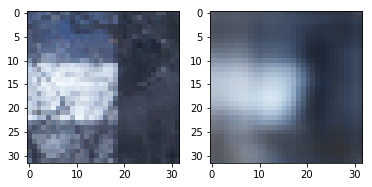

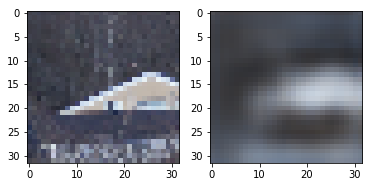

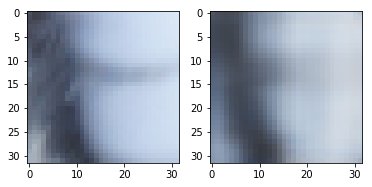

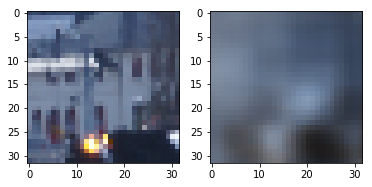

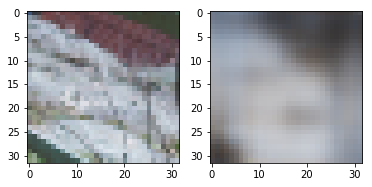

In [14]:
from PIL import Image

NUM = 5

print("Score neural network")
pred = model.predict(dataset[0:NUM])

cols,rows = 32,32
for i in range(NUM):
    predicted = pred[i].reshape(rows,cols,3)
    original = dataset[i].reshape(rows,cols,3)   
    
    skimage.io.imshow_collection([original,predicted])
    skimage.io.show()

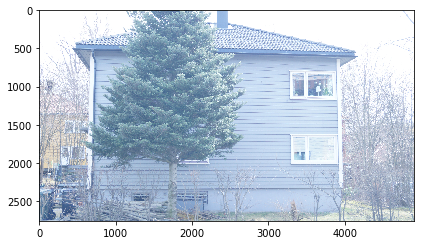

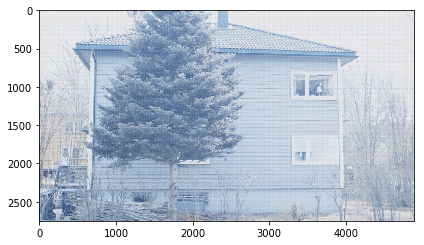

In [15]:
from skimage import io
import math

cropWidth, cropHeight = (32,32)


io.use_plugin('matplotlib')
im = skimage.util.img_as_float32(io.imread("raw_images/DSC0" + str(9003) +".JPG"))
#im = skimage.util.img_as_float32(io.imread("gruppe.jpg"))
height, width, debth = im.shape

io.imshow(im)
io.show()

numWidth, numHeight = math.floor(width / cropWidth) , math.floor(height / cropHeight)

firstRow = True

for x in range(numHeight):
    firstCol = True
    for y in range(numWidth):
        cropped = im[x*cropWidth:(x+1)*cropWidth,y*cropHeight:(y+1)*cropHeight]
        
        croppedArray = [cropped]
        croppedArray = np.array(croppedArray)
        croppedArray = model.predict(croppedArray)
        
        cropped = croppedArray[0].reshape(cropWidth,cropHeight,3)
        
        if(firstCol):
            row = cropped
            firstCol = False
        else:
            row = np.concatenate((row,cropped),axis=1)
    if(firstRow):
        out = row
        firstRow = False
    else:
        out = np.concatenate((out,row),axis=0)
io.imshow(out)
io.show()
io.imsave('encoded-decoded-2x2.png',out)

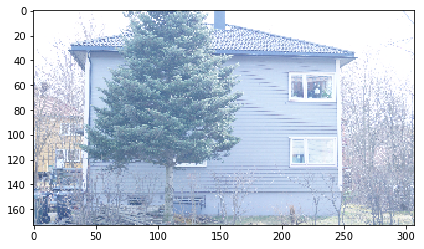

In [18]:
io.imshow(im[::16,::16])
io.show()